In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Testing_v1 import run_strategy 
import warnings
warnings.filterwarnings('ignore')

In [2]:
def forwardtest_and_plot(file_names, period=20, multiplier=0, x_bars=20, stop_loss=0.2):
    # Define other parameters
    colors = ['blue', 'red']  # Colors for differentiation
    labels = ['In-Sample', 'Out-of-Sample']
    
    # Results storage
    results = {}

    # Run backtests for all files
    for i, file_name in enumerate(file_names):
        cumulative_returns, drawdowns, returns_series = run_strategy(
            file_name=file_name,
            period=period,
            multiplier=multiplier,
            x_bars=x_bars,
            stop_loss=stop_loss
        )
        results[labels[i]] = {
            "cumulative_returns": cumulative_returns,
            "drawdowns": drawdowns,
            "returns_series": returns_series,
            "color": colors[i]
        }

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Plot Equity Curve
    for label, result in results.items():
        axs[0].plot(result["cumulative_returns"], label=label, color=result["color"])
    axs[0].set_title("Equity Curve")
    axs[0].set_ylabel("Cumulative Returns (%)")
    axs[0].legend()
    axs[0].grid(True)

    # Plot Drawdown
    for label, result in results.items():
        axs[1].plot(result["drawdowns"], label=label, color=result["color"])
    axs[1].set_title("Drawdown")
    axs[1].set_ylabel("Drawdown (%)")
    axs[1].set_xlabel("Trades")
    axs[1].legend()
    axs[1].grid(True)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

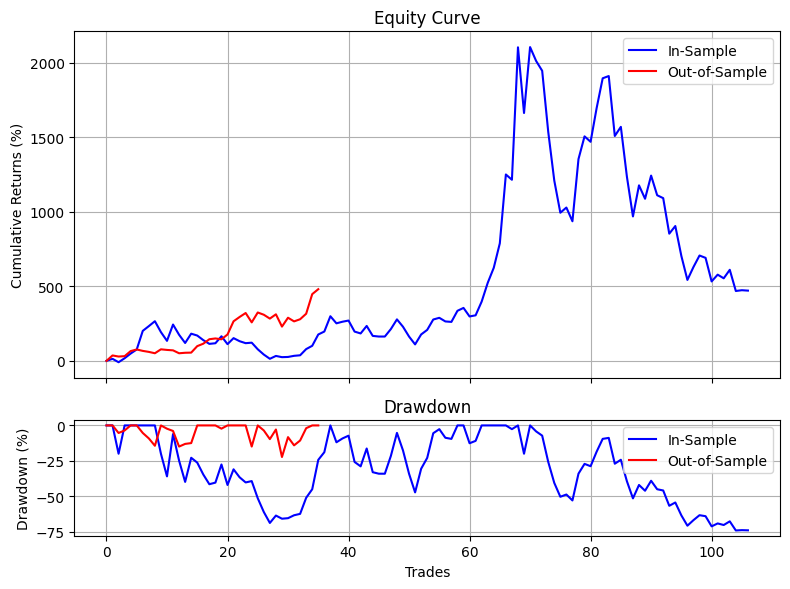

In [3]:
file_names = ['btc_in_sample_data.csv', 'btc_out_of_sample_data.csv']
forwardtest_and_plot(file_names, period=20, multiplier=0, x_bars=20, stop_loss=0.2)

### Strategy Insights and Next Steps

1. Performance overview:
The strategy demonstrates favorable profitability in both in-sample and out-of-sample tests after optimizing parameters, suggesting potential for consistent performance. However, high drawdowns and limited trade frequency raise concerns about the robustness and reliability of the strategy, as these characteristics may indicate a susceptibility to randomness or overfitting.

2. Challenges:
The combination of large drawdowns and a low number of trades makes this strategy challenging to deploy in live trading. High drawdowns can erode trader confidence, and the limited trade frequency could hinder capital efficiency. These factors emphasize the need for improvements in risk management and signal quality.

3. Next Steps – Testing on other pairs:
To assess the robustness of the strategy, we will apply it to the BNB/USDT and ETH/USDT trading pairs. This testing will help determine whether the strategy's success is specific to BNB/USDT and ETH/USDT or if it generalizes to other markets. Key areas to focus on during this test include:

- Profitability consistency: Does the strategy maintain comparable returns on BNB/USDT and ETH/USDT?
- Risk: Is the drawdown similarly high, or does the strategy perform better under different market conditions?
- Trade frequency: Does the number of trades increase or decrease, and how does this impact overall performance?

### BNB/USDT test

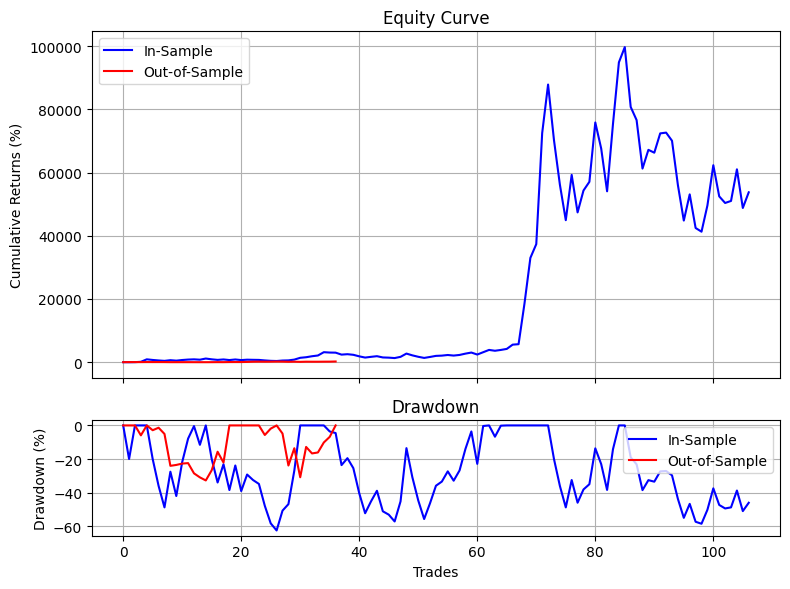

In [4]:
file_names = ['BNB_in_sample_data.csv', 'BNB_out_of_sample_data.csv']
forwardtest_and_plot(file_names, period=20, multiplier=0, x_bars=20, stop_loss=0.2)

### ETH/USDT Test

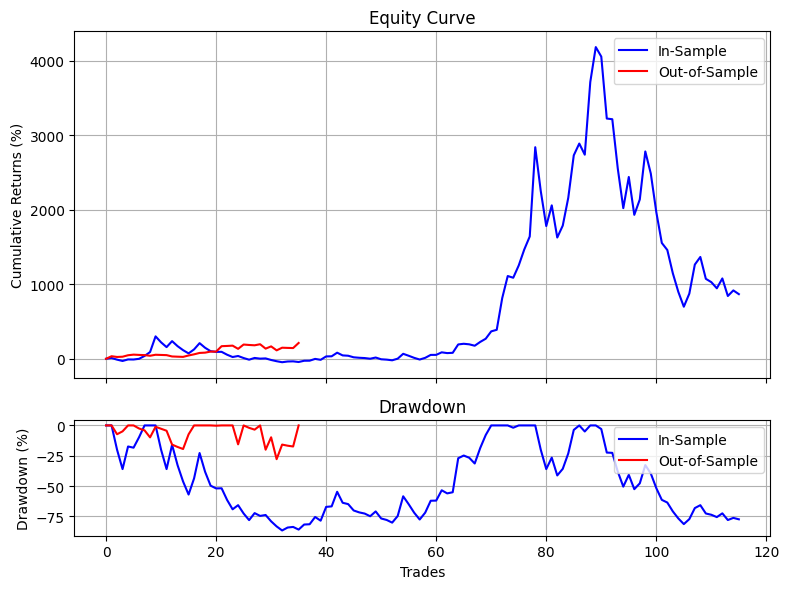

In [5]:
file_names = ['ETH_in_sample_data.csv', 'ETH_out_of_sample_data.csv']
forwardtest_and_plot(file_names, period=20, multiplier=0, x_bars=20, stop_loss=0.2)